In [6]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [7]:
# Período estudado

start_date = '2004-01-01'
end_date = '2024-07-01'

In [8]:
# Baixar dados da Taxa selic

import requests

# Código da série Selic diária
serie_codigo = '1178'

# URL da API do BCB
url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{serie_codigo}/dados?formato=json'

# Solicitar dados da série
response = requests.get(url)
data = response.json()

# Converter para DataFrame
selic = pd.DataFrame(data)
selic['data'] = pd.to_datetime(selic['data'], format='%d/%m/%Y')
selic = selic[selic['data'] >= start_date]
selic = selic[selic['data'] <= end_date]
selic['valor'] = selic['valor'].astype(float)
selic.rename(columns={'data': 'ds', 'valor': 'selic'}, inplace=True)
selic.set_index('ds', inplace=True)

print(selic.head())


            selic
ds               
2004-01-02  16.34
2004-01-05  16.34
2004-01-06  16.34
2004-01-07  16.33
2004-01-08  16.33


In [9]:
# Baixar dados do Ibovespa e outras variáveis

ibov = yf.download('^BVSP', start=start_date, end=end_date)['Close']
ibov.rename('IBOV', inplace=True)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Close']  # S&P 500
sp500.rename('SP500', inplace=True)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)['Close'] # Nasdaq Composite
nasdaq.rename('NASDAQ Composite', inplace=True)
dax = yf.download('^GDAXI', start=start_date, end=end_date)['Close'] # DAX
dax.rename('DAX', inplace=True)
ftse = yf.download('^FTSE', start=start_date, end=end_date)['Close'] # FTSE 100
ftse.rename('FTSE 100', inplace=True)
nikkei = yf.download('^N225', start=start_date, end=end_date)['Close'] # Nikkei 225
nikkei.rename('Nikkei 225', inplace=True)
hsi = yf.download('^HSI', start=start_date, end=end_date)['Close'] # Hang Seng Index
hsi.rename('Hang Seng Index', inplace=True)
cac40 = yf.download('^FCHI', start=start_date, end=end_date)['Close'] # CAC 40
cac40.rename('CAC 40', inplace=True)
vti = yf.download('VTI', start=start_date, end=end_date)['Close'] # Vanguard Total Stock Market ETF
vti.rename('VTI', inplace=True)
eem = yf.download('EEM', start=start_date, end=end_date)['Close'] # iShares MSCI Emerging Markets ETF
eem.rename('EEM', inplace=True)
acwi = yf.download('ACWI', start=start_date, end=end_date)['Close'] # iShares MSCI ACWI ETF
acwi.rename('ACWI', inplace=True)
gld = yf.download('GLD', start=start_date, end=end_date)['Close'] # SPDR Gold Shares
gld.rename('GLD', inplace=True)
ioo = yf.download('IOO', start=start_date, end=end_date)['Close'] # iShares Global 100 ETF
ioo.rename('IOO', inplace=True)
iee = yf.download('IEE', start=start_date, end=end_date)['Close'] # Índice de Energia
iee.rename('IEE', inplace=True)
usd_brl = yf.download('BRL=X', start=start_date, end=end_date)['Close']  # Taxa de câmbio USD/BRL
usd_brl.rename('USD/BRL', inplace=True)
oil = yf.download('CL=F', start=start_date, end=end_date)['Close']  # Preço do petróleo
oil.rename('Oil', inplace=True)
ewz = yf.download('EWZ', start=start_date, end=end_date)['Close'] #ETF EWZ - ibov em dólar
ewz.rename('EWZ', inplace=True)
eem = yf.download('EEM', start=start_date, end=end_date)['Close'] #ETF EEM - grande e médias empresas de 26 países emergentes
eem.rename('EEM', inplace=True)
gold = yf.download('GC=F', start=start_date, end=end_date)['Close'] #preço do ouro
gold.rename('Gold', inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Date
2004-01-05     424.399994
2004-01-06     422.799988
2004-01-07     421.899994
2004-01-08     424.000000
2004-01-09     426.399994
                 ...     
2024-06-24    2330.000000
2024-06-25    2316.600098
2024-06-26    2299.199951
2024-06-27    2324.500000
2024-06-28    2327.699951
Name: Gold, Length: 5148, dtype: float64

In [10]:
 #Baixar dados dos principais presentes nos índices IFNC, IMAT, IEE e PETR4

# IFNC
itub4 = yf.download('ITUB4.SA', start=start_date, end=end_date)['Close'] #Itau
itub4.rename('ITUB4', inplace=True)
bbas3 = yf.download('BBAS3.SA', start=start_date, end=end_date)['Close'] #Banco do Brasil
bbas3.rename('BBAS3', inplace=True)
b3sa3 = yf.download('B3SA3.SA', start=start_date, end=end_date)['Close'] #B3
b3sa3.rename('B3SA3', inplace=True)
bbdc4 = yf.download('BBDC4.SA', start=start_date, end=end_date)['Close'] #Banco Bradesco
bbdc4.rename('BBDC4', inplace=True)
bpac11 = yf.download('BPAC11.SA', start=start_date, end=end_date)['Close'] #Banco do BTG
bpac11.rename('BPAC11', inplace=True)
sanb11 = yf.download('SANB11.SA', start=start_date, end=end_date)['Close'] #Santander
sanb11.rename('SANB11', inplace=True)
itsa4 = yf.download('ITSA4.SA', start=start_date, end=end_date)['Close'] #Itaúsa
itsa4.rename('ITSA4', inplace=True)

# IMAT
vale3 = yf.download('VALE3.SA', start=start_date, end=end_date)['Close'] #Vale
vale3.rename('VALE3', inplace=True)
suzb3 = yf.download('SUZB3.SA', start=start_date, end=end_date)['Close'] #Suzano
suzb3.rename('SUZB3', inplace=True)
ggbr4 = yf.download('GGBR4.SA', start=start_date, end=end_date)['Close'] #Gerdau
ggbr4.rename('GGBR4', inplace=True)
klbn11 = yf.download('KLBN11.SA', start=start_date, end=end_date)['Close'] #Klabin
klbn11.rename('KLBN11', inplace=True)
csna3 = yf.download('CSNA3.SA', start=start_date, end=end_date)['Close'] #Cosan
csna3.rename('CSNA3', inplace=True)
goau4 = yf.download('GOAU4.SA', start=start_date, end=end_date)['Close'] #Metalúrgica Gerdau
goau4.rename('GOAU4', inplace=True)

# IEE
cmig4 = yf.download('CMIG4.SA', start=start_date, end=end_date)['Close'] #Cemig
cmig4.rename('CMIG4', inplace=True)
coce5 = yf.download('COCE5.SA', start=start_date, end=end_date)['Close'] #Coce
coce5.rename('COCE5', inplace=True)
engi11 = yf.download('ENGI11.SA', start=start_date, end=end_date)['Close'] #Energisa
engi11.rename('ENGI11', inplace=True)
cple6 = yf.download('CPLE6.SA', start=start_date, end=end_date)['Close'] #Copel
cple6.rename('CPLE6', inplace=True)
srna3 = yf.download('SRNA3.SA', start=start_date, end=end_date)['Close'] #Serena
srna3.rename('SRNA3', inplace=True)
egie3 = yf.download('EGIE3.SA', start=start_date, end=end_date)['Close'] #Engie Brasil
egie3.rename('EGIE3', inplace=True)
ligt3 = yf.download('LIGT3.SA', start=start_date, end=end_date)['Close'] #Light
ligt3.rename('LIGT3', inplace=True)

# CONSUMO E VAREJO
mglu3 = yf.download('MGLU3.SA', start=start_date, end=end_date)['Close'] #Magazine Luiza
mglu3.rename('MGLU3', inplace=True)

# PETR4
petr4 = yf.download('PETR4.SA', start=start_date, end=end_date)['Close'] #Petrobras
petr4.rename('PETR4', inplace=True)

#OUTROS ÍNDICES ETF
smal11 = yf.download('SMAL11.SA', start=start_date, end=end_date)['Close'] #Índice Small Caps
smal11.rename('SMAL11', inplace=True)
bova11 = yf.download('BOVA11.SA', start=start_date, end=end_date)['Close'] #BOVA11 - ETF que reflete o IBOV
bova11.rename('BOVA11', inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Date
2009-04-17     45.849998
2009-04-20     44.419998
2009-04-22     44.990002
2009-04-23     45.900002
2009-04-24     46.689999
                 ...    
2024-06-24    119.080002
2024-06-25    118.900002
2024-06-26    119.139999
2024-06-27    120.800003
2024-06-28    120.379997
Name: BOVA11, Length: 3743, dtype: float64

In [11]:
# Reamostrar a Taxa Selic para a frequência do Ibovespa
selic = selic.reindex(ibov.index, method='ffill')

# Calcular correlação da Selic com o Ibovespa
selic_corr = ibov.corr(selic['selic'])



In [12]:
# Criar o DataFrame de correlações
index = [sp500, nasdaq, dax, ftse, nikkei, hsi, cac40, bova11,
         ewz, eem, vti, acwi, gld, ioo, smal11,
         usd_brl,
         oil, gold,
         itub4, bbas3, b3sa3, bbdc4, bpac11, sanb11, itsa4,
         vale3, suzb3, ggbr4, klbn11, csna3, goau4,
         cmig4, coce5, engi11, cple6, srna3, egie3, ligt3, petr4,
         mglu3,
         iee]
corr_df = []
for i in index:
    corr_df.append({
        'Ticker': i.name,
        'Correlation': ibov.corr(i)
    })

# Adicionar a correlação da Selic ao DataFrame
corr_df.append({
    'Ticker': 'SELIC',
    'Correlation': selic_corr
})

corr_df = pd.DataFrame(corr_df)

pd.set_option('display.max_rows', None)
print(corr_df)

              Ticker  Correlation
0              SP500     0.893188
1   NASDAQ Composite     0.901262
2                DAX     0.868615
3           FTSE 100     0.721132
4         Nikkei 225     0.815365
5    Hang Seng Index     0.486474
6             CAC 40     0.747128
7             BOVA11     0.999700
8                EWZ    -0.019755
9                EEM     0.652754
10               VTI     0.893768
11              ACWI     0.892929
12               GLD     0.788383
13               IOO     0.880738
14            SMAL11     0.920442
15           USD/BRL     0.767502
16               Oil     0.157408
17              Gold     0.831574
18             ITUB4     0.873531
19             BBAS3     0.882286
20             B3SA3     0.550996
21             BBDC4     0.579919
22            BPAC11     0.927826
23            SANB11     0.802020
24             ITSA4     0.912526
25             VALE3     0.856281
26             SUZB3     0.914612
27             GGBR4     0.600470
28            

In [13]:
import plotly.express as px

# Adicionar uma coluna para a categoria (opcional, se não tiver categorizado antes)
corr_df['Category'] = corr_df['Ticker'].apply(lambda x: 
                                             'Índices Globais' if x in ['SP500', 'NASDAQ Composite', 'DAX', 'FTSE 100', 'Nikkei 225', 'Hang Seng Index', 'CAC 40', 'BOVA11'] else
                                             'ETFs' if x in ['EWZ', 'EEM', 'Vanguard Total Stock Market ETF', 'iShares MSCI ACWI ETF', 'SPDR Gold Shares', 'iShares Global 100 ETF', 'SMAL11'] else
                                             'Moedas' if x == 'USD/BRL' else
                                             'Commodities' if x in ['Oil', 'Gold'] else
                                             'Bancos' if x in ['ITUB4', 'BBAS3', 'B3SA3', 'BBDC4', 'BPAC11', 'SANB11', 'ITSA4'] else
                                             'Materiais' if x in ['VALE3', 'SUZB3', 'GGBR4', 'KLBN11', 'CSNA3', 'GOAU4'] else
                                             'Energia' if x in ['CMIG4', 'COCE5', 'ENGI11', 'CPLE6', 'SRNA3', 'EGIE3', 'LIGT3', 'PETR4'] else
                                             'Consumo e Varejo' if x == 'MGLU3' else
                                             'Outros Índices' if x in ['Índice de Commodities Brasil', 'Índice de Consumo', 'Índice de Energia', 'Índice de Saúde'] else 'Outros')

# Criação do gráfico
fig = px.bar(corr_df, x='Ticker', y='Correlation', 
             color='Category',  # Adiciona a cor por categoria
             title='Correlação entre o Ibovespa e outras variáveis',
             text='Correlation',
             labels={
                 "Ticker": "Ativo/Índice",
                 "Correlation": "Correlação",
                 "Category": "Categoria"
             })

# Adicionar área cinza clara entre as linhas de referência
fig.add_shape(type="rect",
              x0=-0.5, x1=len(corr_df)-0.5, y0=-0.7, y1=0.7,
              fillcolor="gray", opacity=0.3, layer="below", line_width=0)

# Adicionar linhas de referência horizontais
fig.add_hline(y=0.7, line_dash="dash", line_color="gray", annotation_text="Forte Correlação Positiva", annotation_position="bottom right")
fig.add_hline(y=-0.7, line_dash="dash", line_color="gray", annotation_text="Forte Correlação Negativa", annotation_position="top right")

# Atualizar traços e layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=-50, yaxis=dict(range=[-1, 1.2]),
                  xaxis_title='Ativo/Índice', yaxis_title='Correlação',
                  legend_title_text='Categoria', margin=dict(l=40, r=40, t=80, b=120))



# Exibir o gráfico
fig.show()



In [14]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import yfinance as yf

# Baixar dados e combinar em um único DataFrame
data = pd.concat([
    ibov, sp500, nasdaq, dax, ftse, nikkei, hsi, cac40, bova11,
    ewz, eem, vti, acwi, gld, ioo, smal11, usd_brl, oil, gold,
    itub4, bbas3, b3sa3, bbdc4, bpac11, sanb11, itsa4,
    vale3, suzb3, ggbr4, klbn11, csna3, goau4,
    cmig4, coce5, engi11, cple6, srna3, egie3, ligt3, petr4,
    mglu3, iee
], axis=1)

# Calcular a matriz de correlação
corr_matrix = data.corr()

# Ajustar correlações acima de 0,95 para 1
corr_matrix = corr_matrix.applymap(lambda x: 1 if x > 0.95 else x)

# Criar DataFrame com pares de variáveis e suas correlações
pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        var1 = corr_matrix.columns[i]
        var2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        pairs.append((var1, var2, corr_value))

# Converter para DataFrame e ordenar por correlação absoluta
pairs_df = pd.DataFrame(pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])
pairs_df = pairs_df.sort_values(by='Correlation', ascending=False)

# Recriar a matriz de correlação ordenada
sorted_columns = pd.unique(pairs_df[['Variable 1', 'Variable 2']].values.ravel('K'))
sorted_corr_matrix = corr_matrix.loc[sorted_columns, sorted_columns]

# Criar a máscara para evitar duplicações
mask = np.zeros_like(sorted_corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True  # Apenas a metade superior

# Criar o gráfico de matriz de correlação usando Plotly Graph Objects
fig = go.Figure(data=go.Heatmap(
    z=np.where(mask, sorted_corr_matrix.values, np.nan),  # Aplica a máscara
    x=sorted_corr_matrix.columns,
    y=sorted_corr_matrix.columns,
    colorscale='RdBu_r',
    zmin=-1,
    zmax=1,
    colorbar=None  # Remove a barra de legenda
))

# Adicionar rótulos apenas na metade superior
annotations = []
for i in range(len(sorted_corr_matrix.columns)):
    for j in range(i + 1, len(sorted_corr_matrix.columns)):
        annotations.append(dict(
            x=sorted_corr_matrix.columns[j],
            y=sorted_corr_matrix.columns[i],
            text=f"{sorted_corr_matrix.iloc[i, j]:.1f}",
            showarrow=False,
            font=dict(size=10, color='black'),
            xanchor='center',
            yanchor='middle'
        ))

# Atualizar layout
fig.update_layout(
    title='Matriz de Correlação entre Variáveis',
    title_x=0.5,
    title_y=0.95,
    xaxis_title='Variáveis',
    yaxis_title='Variáveis',
    xaxis=dict(
        tickvals=list(range(len(sorted_corr_matrix.columns))),
        ticktext=sorted_corr_matrix.columns,
        tickangle=-45
    ),
    yaxis=dict(
        tickvals=list(range(len(sorted_corr_matrix.columns))),
        ticktext=sorted_corr_matrix.columns,
        tickangle=0
    ),
    margin=dict(l=100, r=20, t=80, b=100),
    height=1000,
    width=1000
)

# Ajustar a proporção de aspecto para garantir que os quadrados sejam iguais
fig.update_xaxes(scaleanchor='y')
fig.update_yaxes(constrain='domain')

# Adicionar as anotações
fig.update_layout(annotations=annotations)

# Exibir o gráfico
fig.show()


/tmp/ipykernel_34748/3387284582.py:20: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [15]:
# Mostrar o DataFrame de correlações
print("Correlação entre o Ibovespa e outras variáveis:")
print(corr_df)


Correlação entre o Ibovespa e outras variáveis:
              Ticker  Correlation          Category
0              SP500     0.893188   Índices Globais
1   NASDAQ Composite     0.901262   Índices Globais
2                DAX     0.868615   Índices Globais
3           FTSE 100     0.721132   Índices Globais
4         Nikkei 225     0.815365   Índices Globais
5    Hang Seng Index     0.486474   Índices Globais
6             CAC 40     0.747128   Índices Globais
7             BOVA11     0.999700   Índices Globais
8                EWZ    -0.019755              ETFs
9                EEM     0.652754              ETFs
10               VTI     0.893768            Outros
11              ACWI     0.892929            Outros
12               GLD     0.788383            Outros
13               IOO     0.880738            Outros
14            SMAL11     0.920442              ETFs
15           USD/BRL     0.767502            Moedas
16               Oil     0.157408       Commodities
17              

In [16]:
# Criar um DataFrame com o índice de datas comuns
dates = ibov.index

# Reindexar todas as séries para ter as mesmas datas
sp500 = sp500.reindex(dates)
nasdaq = nasdaq.reindex(dates)
dax = dax.reindex(dates)
ftse = ftse.reindex(dates)
nikkei = nikkei.reindex(dates)
cac40 = cac40.reindex(dates)
smal11 = smal11.reindex(dates)
vti = vti.reindex(dates)
acwi = acwi.reindex(dates)
gld = gld.reindex(dates)
ioo = ioo.reindex(dates)
usd_brl = usd_brl.reindex(dates)
gold = gold.reindex(dates)

itub4 = itub4.reindex(dates)
bbas3 = bbas3.reindex(dates)
bpac11 = bpac11.reindex(dates)
sanb11 = sanb11.reindex(dates)
itsa4 = itsa4.reindex(dates)
vale3 = vale3.reindex(dates)
suzb3 = suzb3.reindex(dates)
coce5 = coce5.reindex(dates)
engi11 = engi11.reindex(dates)
cple6 = cple6.reindex(dates)
egie3 = egie3.reindex(dates)

In [17]:
# Função para calcular o RSI
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(0)

In [18]:
# Calcular o RSI para o Ibovespa
rsi_ibov = calculate_rsi(ibov, 14)
rsi_ibov.head(10000)
rsi_ibov.mean()

52.670854053139735

In [19]:
# Criar novas features de variação percentual
sp500_pct = sp500.pct_change().fillna(0)
nasdaq_pct = nasdaq.pct_change().fillna(0)
dax_pct = dax.pct_change().fillna(0)
ftse_pct = ftse.pct_change().fillna(0)
nikkei_pct = nikkei.pct_change().fillna(0)
cac40_pct = cac40.pct_change().fillna(0)
smal11_pct = smal11.pct_change().fillna(0)
vti_pct = vti.pct_change().fillna(0)
acwi_pct = acwi.pct_change().fillna(0)
gld_pct = gld.pct_change().fillna(0)
ioo_pct = ioo.pct_change().fillna(0)
usd_brl_pct = usd_brl.pct_change().fillna(0)
gold_pct = gold.pct_change().fillna(0)
itub4_pct = itub4.pct_change().fillna(0)
bbas3_pct = bbas3.pct_change().fillna(0)
bpac11_pct = bpac11.pct_change().fillna(0)
sanb11_pct = sanb11.pct_change().fillna(0)
itsa4_pct = itsa4.pct_change().fillna(0)
vale3_pct = vale3.pct_change().fillna(0)
suzb3_pct = suzb3.pct_change().fillna(0)
coce5_pct = coce5.pct_change().fillna(0)
engi11_pct = engi11.pct_change().fillna(0)
cple6_pct = cple6.pct_change().fillna(0)
egie3_pct = egie3.pct_change().fillna(0)





/tmp/ipykernel_34748/24659029.py:2: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_34748/24659029.py:3: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_34748/24659029.py:4: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipykernel_34748/24659029.py:5: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version.

In [20]:
 #Combinar dados em um único DataFrame
data = pd.DataFrame({
    'ds': dates,
    'y': ibov.values,
    'RSI_Ibov': rsi_ibov.values,
    'SP500': sp500.values,
    'NASDAQ': nasdaq.values,
    'DAX': dax.values,
    'FTSE': ftse.values,
    'NIKKEI': nikkei.values,
    'CAC40': cac40.values,
    'SMAL11': smal11.values,
    'VTI11': vti.values,
    'ACWI': acwi.values,
    'GLD': gld.values,
    'IOO': ioo.values,
    'USD/BRL': usd_brl.values,
    'Gold': gold.values,
    'ITUB4': itub4.values,
    'BBAS3': bbas3.values,
    'BPAC11': bpac11.values,
    'SANB11': sanb11.values,
    'ITSA4': itsa4.values,
    'VALE3': vale3.values,
    'SUZB3': suzb3.values,
    'COCE5': coce5.values,
    'ENGI11': engi11.values,
    'CPLE6': cple6.values,
    'EGIE3': egie3.values,
    'SP500_pct': sp500_pct.values,
    'NASDAQ_pct': nasdaq_pct.values,
    'DAX_pct': dax_pct.values,
    'FTSE_pct': ftse_pct.values,
    'NIKKEI_pct': nikkei_pct.values,
    'CAC40_pct': cac40_pct.values,
    'SMAL11_pct': smal11_pct.values,
    'VTI_pct': vti_pct.values,
    'ACWI_pct': acwi_pct.values,
    'GLD_pct': gld_pct.values,
    'IOO_pct': ioo_pct.values,
    'USD/BRL_pct': usd_brl_pct.values,
    'Gold_pct': gold_pct.values,
    'ITUB4_pct': itub4_pct.values,
    'BBAS3_pct': bbas3_pct.values,
    'BPAC11_pct': bpac11_pct.values,
    'SANB11_pct': sanb11_pct.values,
    'ITSA4_pct': itsa4_pct.values,
    'ITUB4_pct': itub4_pct.values,
    'VALE3_pct': vale3_pct.values,
    'SUZB3_pct': suzb3_pct.values,
    'COCE5_pct': coce5_pct.values,
    'ENGI11_pct': engi11_pct.values,
    'CPLE6_pct': cple6_pct.values,
    'EGIE3_pct':egie3_pct.values



})
# Se 'selic' não tiver a coluna 'ds', adicionar
if 'ds' not in selic.columns:
    selic = selic.reset_index().rename(columns={'index': 'ds'})

# Garantir que 'selic' tenha uma coluna 'ds' para a junção
selic = selic.rename(columns={selic.columns[0]: 'ds'})

# Adicionar selic
data = pd.merge(data, selic, how = 'left', on = 'ds')

# Preencher valores nulos
data = data.fillna(0)


In [21]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5072 entries, 0 to 5071
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           5072 non-null   datetime64[ns]
 1   y            5072 non-null   float64       
 2   RSI_Ibov     5072 non-null   float64       
 3   SP500        5072 non-null   float64       
 4   NASDAQ       5072 non-null   float64       
 5   DAX          5072 non-null   float64       
 6   FTSE         5072 non-null   float64       
 7   NIKKEI       5072 non-null   float64       
 8   CAC40        5072 non-null   float64       
 9   SMAL11       5072 non-null   float64       
 10  VTI11        5072 non-null   float64       
 11  ACWI         5072 non-null   float64       
 12  GLD          5072 non-null   float64       
 13  IOO          5072 non-null   float64       
 14  USD/BRL      5072 non-null   float64       
 15  Gold         5072 non-null   float64       
 16  ITUB4 

In [22]:
# Função para criação de DataFrame com feriados

from prophet.make_holidays import make_holidays_df

In [23]:
# Criação dos DataFrames com feriados munícipais de São Paulo e nacionais
anos = data['ds'].dt.year.unique()

feriados_sp = make_holidays_df(country='BR', state='SP', year_list=anos)
feriados_br = make_holidays_df(country='BR', year_list=anos)

# Concatenação dos DataFrames
feriados = pd.concat([feriados_sp, feriados_br])

In [24]:
# Criação dos DataFrames com os principais períodos relevantes

pre_sal = pd.DataFrame({
    'holiday': 'pre_sal',
    'ds': pd.to_datetime(['2006-07-01']),
    'df_upper': pd.to_datetime(['2008-01-01']),
    'lower_window': 0,
    'upper_window': 0
})

crise_subprime = pd.DataFrame({
    'holiday': 'crise_subprime',
    'ds': pd.to_datetime(['2008-09-15']),
    'df_upper': pd.to_datetime(['2009-09-15']),
    'lower_window': 0,
    'upper_window': 0
})

impeachment = pd.DataFrame({
    'holiday': 'impeachment',
    'ds': pd.to_datetime(['2015-12-15']),
    'df_upper': pd.to_datetime(['2016-08-31']),
    'lower_window': 0,
    'upper_window': 0
})

pandemia = pd.DataFrame({
    'holiday': 'pandemia',
    'ds': pd.to_datetime(['2020-03-11']),
    'df_upper': pd.to_datetime(['2022-04-22']),
    'lower_window': 0,
    'upper_window': 0
})

In [25]:
# Eleições para presidente

datas_eleicao = ['2002-10-27', '2006-10-29', '2010-10-31', '2014-10-26', '2018-10-28', '2022-10-30']

eleicao = pd.DataFrame({
    'holiday': 'eleicao',
    'ds': pd.to_datetime(datas_eleicao),
    'lower_window': -1,
    'upper_window': 0
})

In [26]:
# Concatenar os DataFrames de feriados e períodos relevantes

feriados_df = pd.concat([pre_sal, crise_subprime, eleicao, impeachment, pandemia, feriados])

feriados_df.drop_duplicates(inplace=True)

feriados_df['lower_window'] = feriados_df['lower_window'].fillna(-1)
feriados_df['upper_window'] = feriados_df['upper_window'].fillna(1)

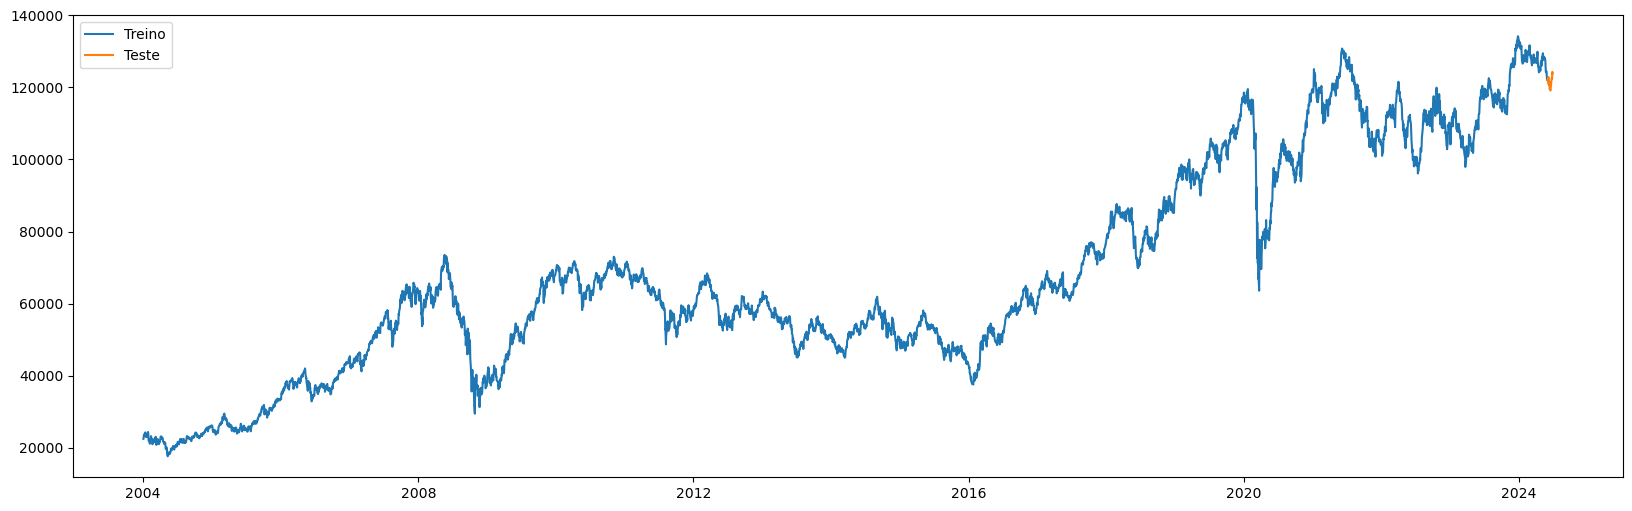

In [33]:
# Dividir dados em treino e teste
train = data[data['ds'] <= '2024-05-31']
test = data[data['ds'] >= '2024-06-01']

# Ajustar o modelo Prophet com variáveis exógenas
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0,
    holidays=feriados_df
)

plt.figure(figsize=(20, 6))
plt.plot(train['ds'], train['y'], label='Treino')
plt.plot(test['ds'], test['y'], label='Teste')
plt.legend()

In [34]:
#Adicionar os regressores

model.add_regressor('RSI_Ibov')
model.add_regressor('SP500')
model.add_regressor('NASDAQ') #
model.add_regressor('DAX') #
model.add_regressor('FTSE')
model.add_regressor('NIKKEI')
model.add_regressor('CAC40')
model.add_regressor('SMAL11')
model.add_regressor('VTI11')
model.add_regressor('ACWI')
model.add_regressor('GLD')
model.add_regressor('IOO')
model.add_regressor('USD/BRL')
model.add_regressor('Gold')
model.add_regressor('ITUB4')
model.add_regressor('BBAS3')
model.add_regressor('BPAC11')
model.add_regressor('SANB11')
model.add_regressor('ITSA4')
model.add_regressor('VALE3')
model.add_regressor('SUZB3')
model.add_regressor('COCE5')
model.add_regressor('ENGI11')
model.add_regressor('CPLE6')
model.add_regressor('SP500_pct')
model.add_regressor('NASDAQ_pct')
model.add_regressor('DAX_pct')
model.add_regressor('FTSE_pct')
model.add_regressor('NIKKEI_pct')
model.add_regressor('CAC40_pct')
model.add_regressor('SMAL11_pct')
model.add_regressor('VTI_pct')
model.add_regressor('ACWI_pct')
model.add_regressor('GLD_pct')
model.add_regressor('IOO_pct')
model.add_regressor('USD/BRL_pct')
model.add_regressor('Gold_pct')
model.add_regressor('ITUB4_pct')
model.add_regressor('BBAS3_pct')
model.add_regressor('BPAC11_pct')
model.add_regressor('SANB11_pct')
model.add_regressor('ITSA4_pct')
model.add_regressor('ITUB4_pct')
model.add_regressor('VALE3_pct')
model.add_regressor('SUZB3_pct')
model.add_regressor('COCE5_pct')
model.add_regressor('ENGI11_pct')
model.add_regressor('CPLE6_pct')
model.add_regressor('EGIE3_pct')
model.add_regressor('selic')






In [35]:
# Treinar o modelo
model.fit(train)

# Fazer previsões
future = model.make_future_dataframe(periods=len(test))
future['RSI_Ibov'] = data['RSI_Ibov'].reset_index(drop=True)
future['SP500'] = data['SP500'].reset_index(drop=True)
future['NASDAQ'] = data['NASDAQ'].reset_index(drop=True)
future['DAX'] = data['DAX'].reset_index(drop=True)
future['FTSE'] = data['FTSE'].reset_index(drop=True)
future['NIKKEI'] = data['NIKKEI'].reset_index(drop=True)
future['CAC40'] = data['CAC40'].reset_index(drop=True)
future['SMAL11'] = data['SMAL11'].reset_index(drop=True)
future['VTI11'] = data['VTI11'].reset_index(drop=True)
future['ACWI'] = data['ACWI'].reset_index(drop=True)
future['GLD'] = data['GLD'].reset_index(drop=True)
future['IOO'] = data['IOO'].reset_index(drop=True)
future['USD/BRL'] = data['USD/BRL'].reset_index(drop=True)
future['Gold'] = data['Gold'].reset_index(drop=True)
future['ITUB4'] = data['ITUB4'].reset_index(drop=True)
future['BBAS3'] = data['BBAS3'].reset_index(drop=True)
future['BPAC11'] = data['BPAC11'].reset_index(drop=True)
future['SANB11'] = data['SANB11'].reset_index(drop=True)
future['ITSA4'] = data['ITSA4'].reset_index(drop=True)
future['VALE3'] = data['VALE3'].reset_index(drop=True)
future['SUZB3'] = data['SUZB3'].reset_index(drop=True)
future['COCE5'] = data['COCE5'].reset_index(drop=True)
future['ENGI11'] = data['ENGI11'].reset_index(drop=True)
future['CPLE6'] = data['CPLE6'].reset_index(drop=True)
future['SP500_pct'] = data['SP500_pct'].reset_index(drop=True)
future['NASDAQ_pct'] = data['NASDAQ_pct'].reset_index(drop=True)
future['DAX_pct'] = data['DAX_pct'].reset_index(drop=True)
future['FTSE_pct'] = data['FTSE_pct'].reset_index(drop=True)
future['NIKKEI_pct'] = data['NIKKEI_pct'].reset_index(drop=True)
future['CAC40_pct'] = data['CAC40_pct'].reset_index(drop=True)
future['SMAL11_pct'] = data['SMAL11_pct'].reset_index(drop=True)
future['VTI_pct'] = data['VTI_pct'].reset_index(drop=True)
future['ACWI_pct'] = data['ACWI_pct'].reset_index(drop=True)
future['GLD_pct'] = data['GLD_pct'].reset_index(drop=True)
future['IOO_pct'] = data['IOO_pct'].reset_index(drop=True)
future['USD/BRL_pct'] = data['USD/BRL_pct'].reset_index(drop=True)
future['Gold_pct'] = data['Gold_pct'].reset_index(drop=True)
future['ITUB4_pct'] = data['ITUB4_pct'].reset_index(drop=True)
future['BBAS3_pct'] = data['BBAS3_pct'].reset_index(drop=True)
future['VALE3_pct'] = data['VALE3_pct'].reset_index(drop=True)
future['SUZB3_pct'] = data['SUZB3_pct'].reset_index(drop=True)
future['COCE5_pct'] = data['COCE5_pct'].reset_index(drop=True)
future['ENGI11_pct'] = data['ENGI11_pct'].reset_index(drop=True)
future['CPLE6_pct'] = data['CPLE6_pct'].reset_index(drop=True)
future['EGIE3_pct'] = data['EGIE3_pct'].reset_index(drop=True)
future['BPAC11_pct'] = data['BPAC11_pct'].reset_index(drop=True)
future['SANB11_pct'] = data['SANB11_pct'].reset_index(drop=True)
future['ITSA4_pct'] = data['ITSA4_pct'].reset_index(drop=True)
future['selic'] = data['selic'].reset_index(drop=True)

# Substituir NaN por 0
future = future.fillna(0)

# Fazer previsões
forecast = model.predict(future)


23:59:57 - cmdstanpy - INFO - Chain [1] start processing
00:00:14 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
# Alinhar as previsões com o período de teste, garantindo datas comuns
forecast_test = forecast[forecast['ds'].isin(test['ds'])].set_index('ds')
test = test.set_index('ds')
common_dates = test.index.intersection(forecast_test.index)
aligned_forecast = forecast_test.loc[common_dates]
aligned_test = test.loc[common_dates]

In [37]:
# Calcular métricas de acurácia
mae = mean_absolute_error(aligned_test['y'], aligned_forecast['yhat'])
mse = mean_squared_error(aligned_test['y'], aligned_forecast['yhat'])
rmse = np.sqrt(mse)

# Calcular a acurácia percentual
valor_medio_real = aligned_test['y'].mean()
acuracia_percentual = 100 * (1 - mae / valor_medio_real)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'Acurácia Percentual: {acuracia_percentual:.2f}%')

MAE: 1438.50
MSE: 2895168.27
RMSE: 1701.52
Acurácia Percentual: 98.81%


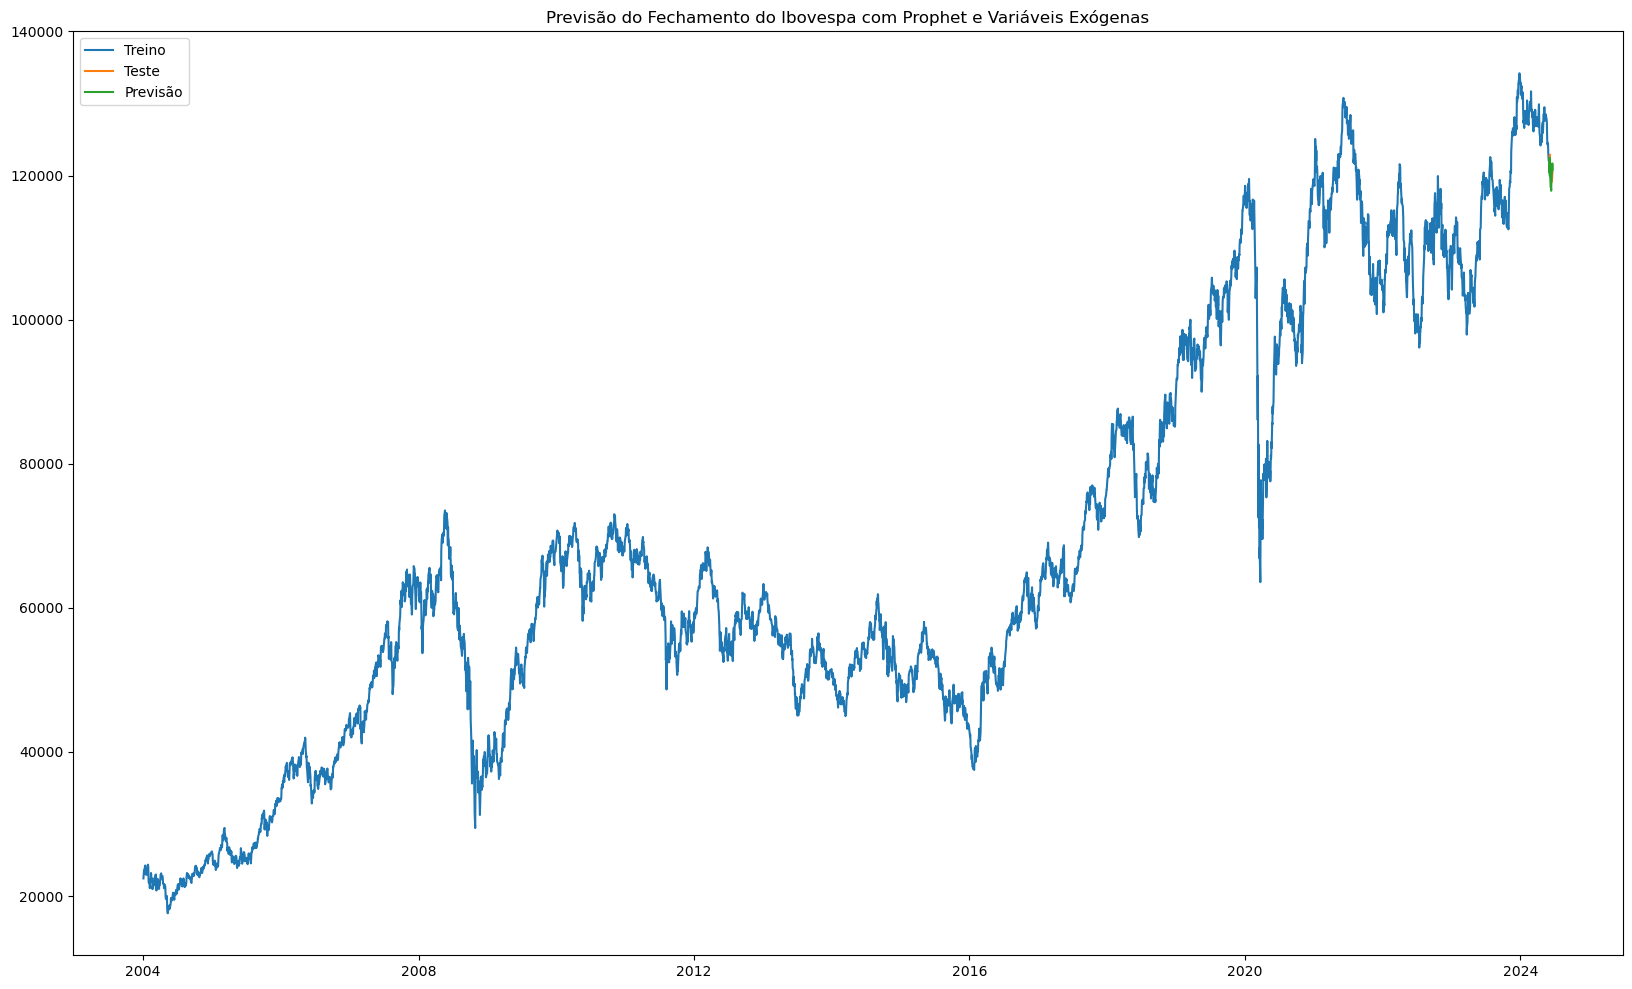

In [38]:
# Plotar os resultados
plt.figure(figsize=(20, 12))
plt.plot(train['ds'], train['y'], label='Treino')
plt.plot(aligned_test.index, aligned_test['y'], label='Teste')
plt.plot(aligned_forecast.index, aligned_forecast['yhat'], label='Previsão')
plt.legend()
plt.title('Previsão do Fechamento do Ibovespa com Prophet e Variáveis Exógenas')
plt.show()